In [48]:
import torch
from torch.utils.data import DataLoader
import networks
import data
import utils
import numpy as np
import matplotlib.pyplot as plt
import neurite as ne 
from tqdm import tqdm

# replace your own data here
# 替换成自己的数据

In [ ]:
# replace your own data here
# 替换成自己的数据

# replace your own data here
# 替换成自己的数据

# replace your own data here
# 替换成自己的数据

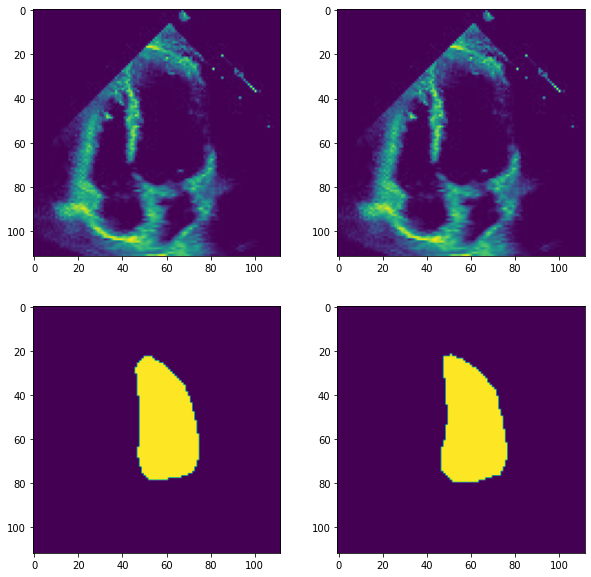

In [52]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(video.squeeze()[large_frame])
plt.subplot(222)
plt.imshow(fixed.squeeze()[0])
plt.subplot(223)
plt.imshow(video_seg[large_frame])
plt.subplot(224)
plt.imshow(fixed_seg[0])
plt.show()

In [77]:
moved_list = []
flow_list = []
# 初始图象
moved = video[:, [large_frame], ...]
for i in range(large_frame, small_frame):
    moved, flow = model(moved, video[:, [i + 1], ...])
    moved_list.append(moved)
    flow_list.append(flow)

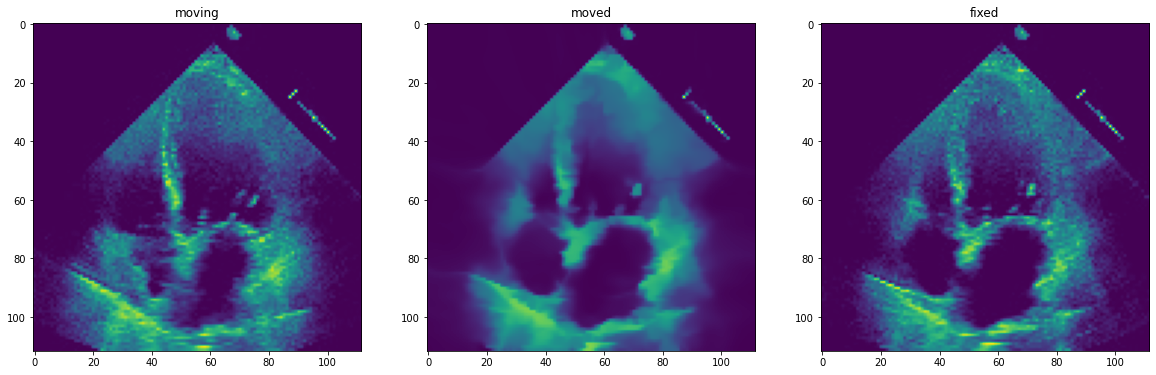

In [78]:
length = len(moved_list)
# plt.figure(figsize=(100, 100))
# for i in range(length):
#     plt.subplot(length, 1, i+1)
#     plt.imshow(moved_list[i].squeeze().detach().cpu().numpy())

plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.title('moving')
plt.imshow(video.squeeze()[large_frame].detach().cpu().numpy())
plt.subplot(132)
plt.title('moved')
plt.imshow(moved_list[-1].squeeze().detach().cpu().numpy())
plt.subplot(133)
plt.title('fixed')
plt.imshow(video.squeeze()[small_frame].detach().cpu().numpy())
plt.show()

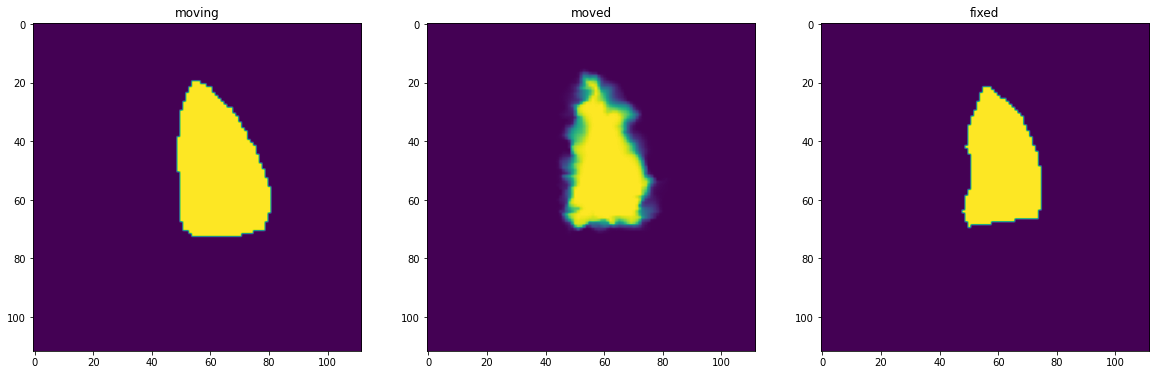

In [79]:
moved_seg = fixed_seg[None, [0], ...]

plt.figure(figsize=(20, 10))

plt.subplot(131)
plt.title('moving')
plt.imshow(moved_seg.squeeze().detach().cpu().numpy())

for i in range(length):
    moved_seg = transformer(moved_seg, flow_list[i])

plt.subplot(132)
plt.title('moved')
plt.imshow(moved_seg.squeeze().detach().cpu().numpy())

plt.subplot(133)
plt.title('fixed')
plt.imshow(fixed_seg.squeeze()[1].detach().cpu().numpy())

In [80]:
import utils

utils.ComputeDice(moved_seg.squeeze().detach().numpy(), fixed_seg.squeeze()[1].detach().cpu().numpy())

0.8815779454662864

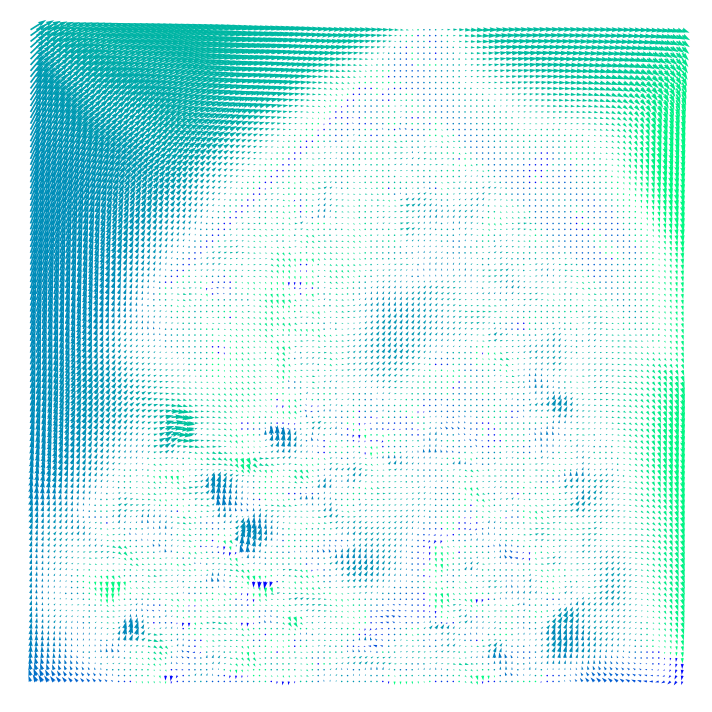

(<Figure size 720x720 with 1 Axes>, [<AxesSubplot:>])

In [81]:
ne.plot.flow([flow_list[0].permute(0, 2, 3, 1).squeeze().detach().numpy()], show=True, width=10)

In [58]:
import layers

com_trans = layers.CompositionTransform2D()

flow_com = flow_list[0]
for i in range(1, length):
    flow_com = com_trans(flow, flow_list[i])

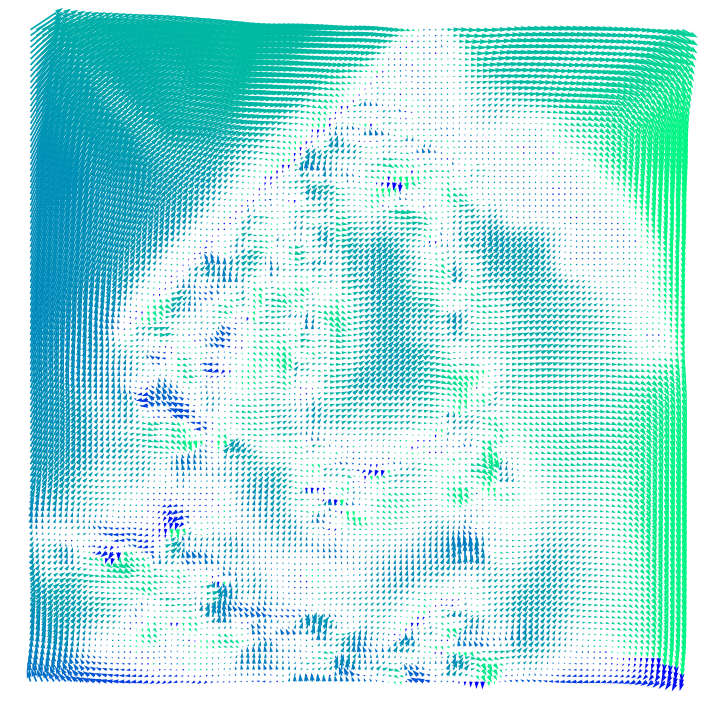

(<Figure size 720x720 with 1 Axes>, [<AxesSubplot:>])

In [59]:
ne.plot.flow([flow_com.permute(0, 2, 3, 1).squeeze().detach().numpy()], show=True, width=10)

In [60]:
dice_list = []
loop = tqdm(train_loader)
for element in loop:
    # video torch.Size([1, 215, 112, 112])
    # fixedimage torch.Size([1, 2, 112, 112])
    # fixedseg torch.Size([1, 2, 112, 112])
    # videoseg torch.Size([1, 215, 112, 112])
    # frames torch.Size([1, 2])
    video = element['video'].to(device) / 255.
    fixed = element['labeled'].to(device) / 255.
    video_seg = element['videoseg'].squeeze().to(device)
    fixed_seg = element['labeledseg'].squeeze().to(device)
    frames = element['frames'].squeeze().int().to(device)
    large_frame = frames[0]
    small_frame = frames[1]

    moved_list = []
    flow_list = []
    moved = video[:, [large_frame], ...]
    for i in range(large_frame, small_frame):
        moved, flow = model(moved, video[:, [i + 1], ...])
        moved_list.append(moved)
        flow_list.append(flow)
        
    length = len(moved_list)
    moved_seg = fixed_seg[None, [0], ...]
    for i in range(length):
        moved_seg = transformer(moved_seg, flow_list[i])

    dice_list.append(utils.ComputeDice(moved_seg.squeeze().detach().numpy(), fixed_seg.squeeze()[1].detach().cpu().numpy()))
    loop.set_description(str(np.mean(dice_list)))

0.7950255025240224: 100%|██████████| 1276/1276 [05:39<00:00,  3.76it/s]


In [61]:
moved_d, flow_d = model(video[:, [large_frame], ...], video[:, [small_frame], ...])

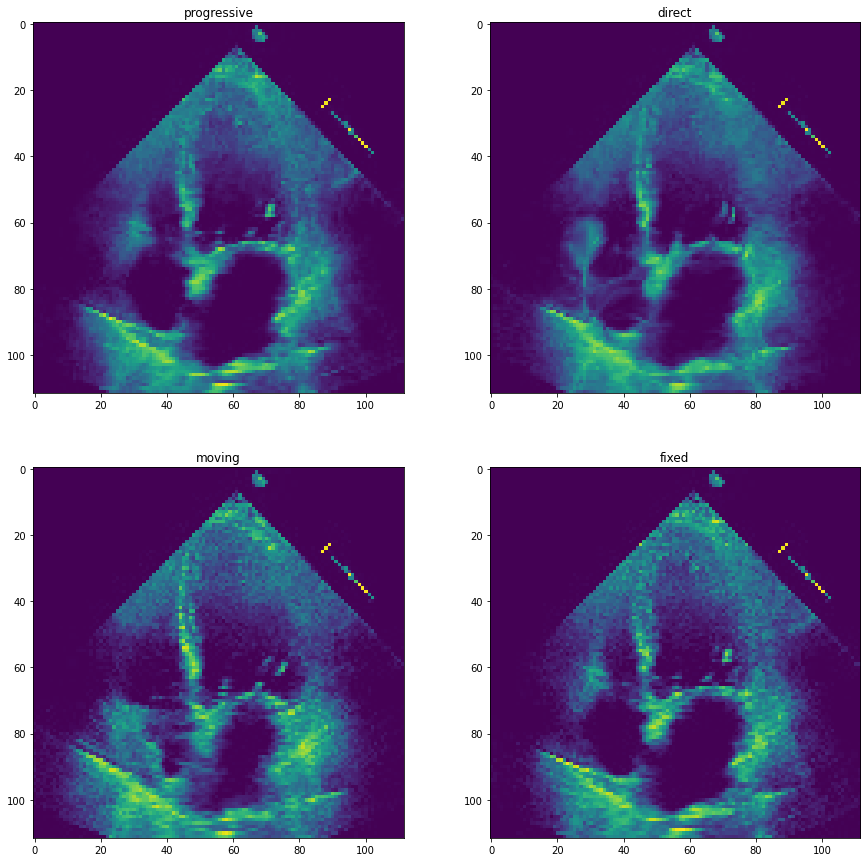

In [62]:
plt.figure(figsize=(15, 15))

plt.subplot(221)
plt.title('progressive')
plt.imshow(moved_list[-1].squeeze().detach().cpu().numpy())
plt.subplot(222)
plt.title('direct')
plt.imshow(moved_d.squeeze().detach().cpu().numpy())
plt.subplot(223)
plt.title('moving')
plt.imshow(video.squeeze()[large_frame].detach().cpu().numpy())
plt.subplot(224)
plt.title('fixed')
plt.imshow(video.squeeze()[small_frame].detach().cpu().numpy())

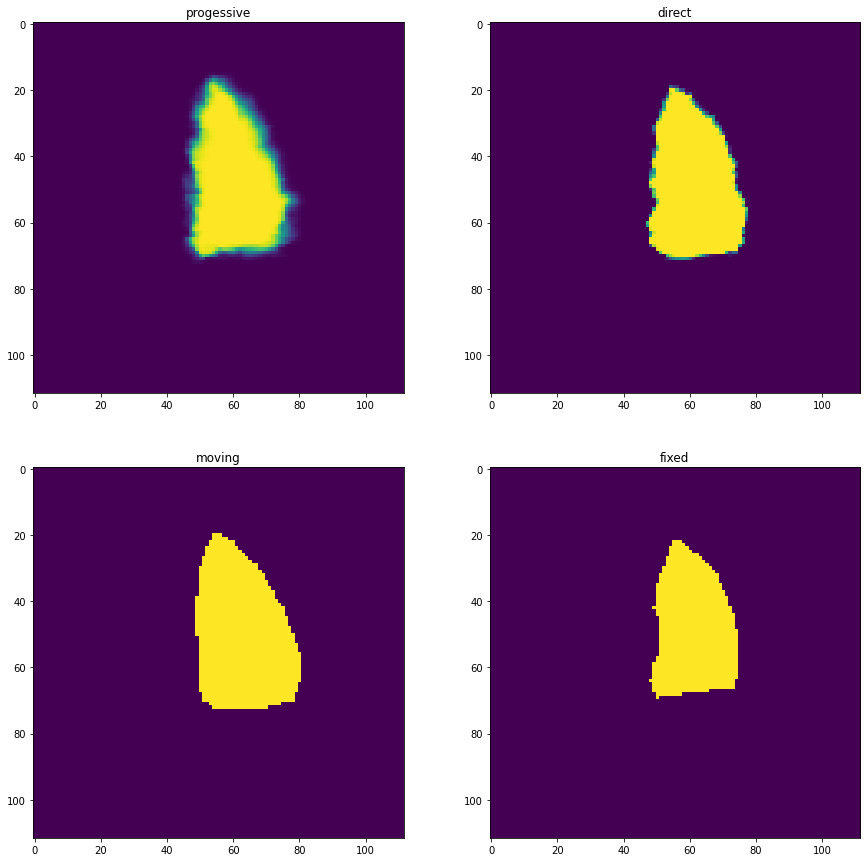

In [63]:
moved_seg_d = transformer(fixed_seg[None, [0], ...], flow_d)

plt.figure(figsize=(15, 15))

plt.subplot(221)
plt.title('progessive')
plt.imshow(moved_seg.squeeze().detach().cpu().numpy())

plt.subplot(222)
plt.title('direct')
plt.imshow(moved_seg_d.squeeze().detach().cpu().numpy())

plt.subplot(223)
plt.title('moving')
plt.imshow(fixed_seg.squeeze()[0].detach().cpu().numpy())

plt.subplot(224)
plt.title('fixed')
plt.imshow(fixed_seg.squeeze()[1].detach().cpu().numpy())

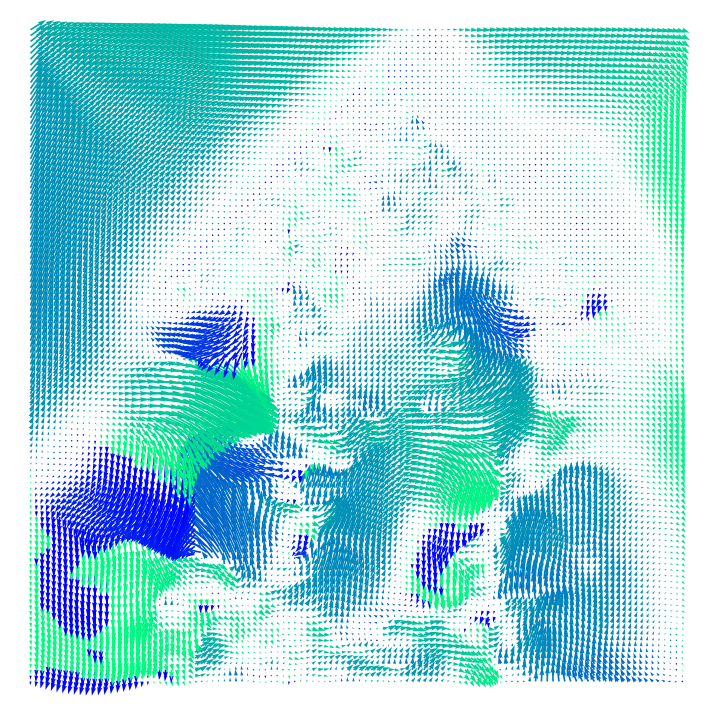

(<Figure size 720x720 with 1 Axes>, [<AxesSubplot:>])

In [64]:
ne.plot.flow([flow_d.permute(0, 2, 3, 1).squeeze().detach().numpy()], show=True, width=10)

In [74]:

import importlib
importlib.reload(utils)

utils.GetNegJDetNum(flow_com)

12318